Comparación entre voz hablada y música instrumental

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Audio 1: Voz hablada
y_voice, sr_voice = librosa.load(librosa.example('fishin'))
print(f"Voz cargada con {sr_voice} Hz, duración: {len(y_voice)/sr_voice:.2f} s")

#audio 2: Trompeta
y_trumpet, sr_trumpet = librosa.load(librosa.example('trumpet'))
print(f"Trompeta cargada con {sr_trumpet} Hz, duración: {len(y_trumpet)/sr_trumpet:.2f} s")


Voz cargada con 22050 Hz, duración: 132.99 s
Trompeta cargada con 22050 Hz, duración: 5.33 s


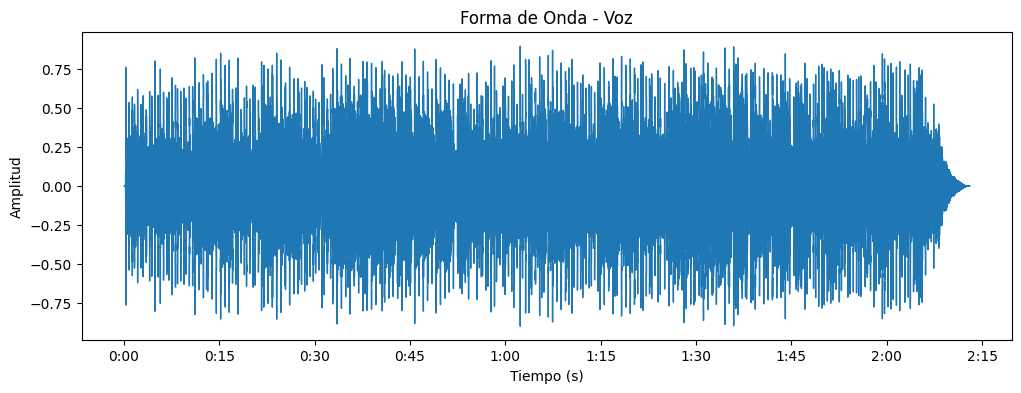

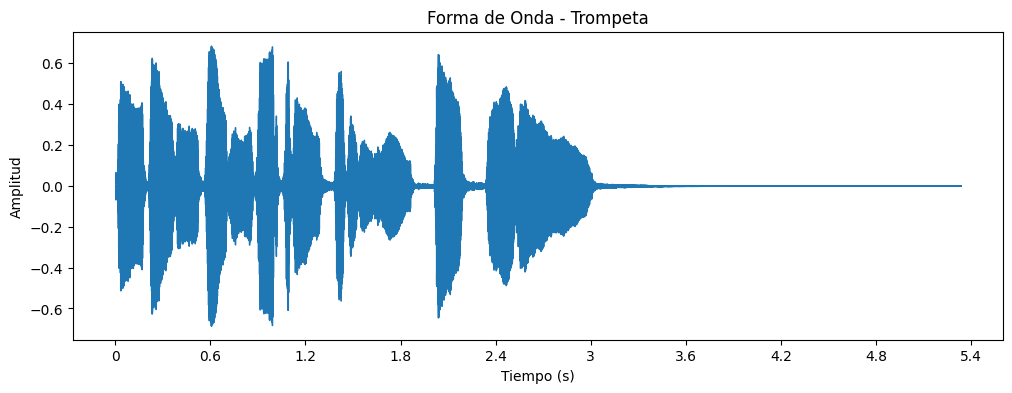

In [7]:
# ------------ Forma de Onda ------------
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_voice, sr=sr_voice)
plt.title("Forma de Onda - Voz")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_trumpet, sr=sr_trumpet)
plt.title("Forma de Onda - Trompeta")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()

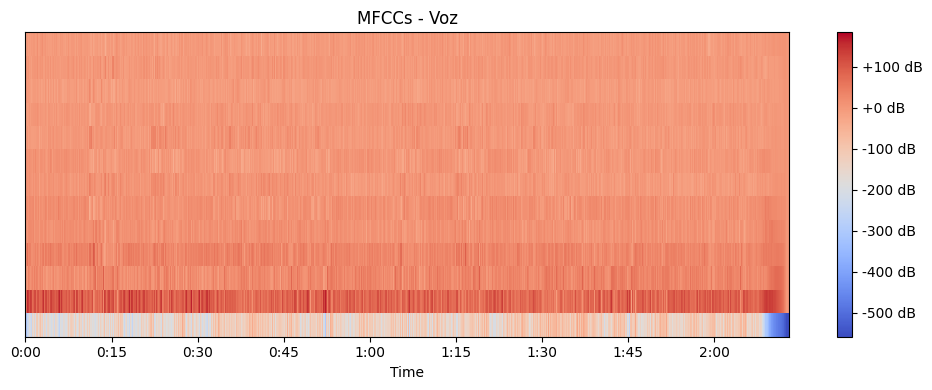

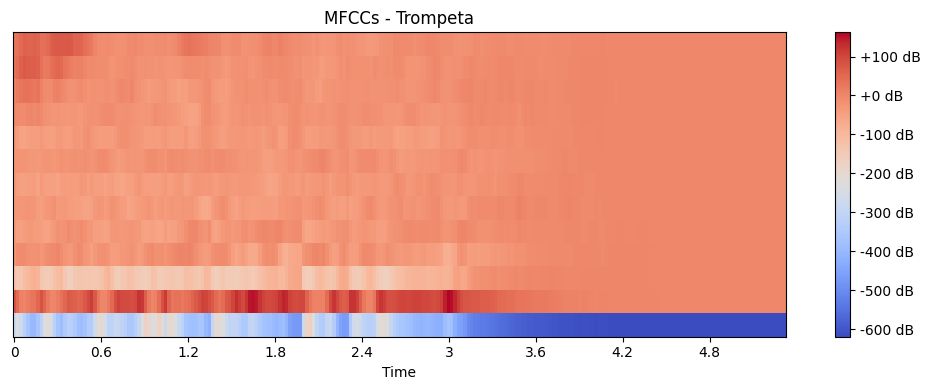

In [9]:
# ------------ MFCCs ------------
mfcc_voice = librosa.feature.mfcc(y=y_voice, sr=sr_voice, n_mfcc=13)
mfcc_trumpet = librosa.feature.mfcc(y=y_trumpet, sr=sr_trumpet, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_voice, x_axis='time', sr=sr_voice)
plt.title('MFCCs - Voz')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_trumpet, x_axis='time', sr=sr_trumpet)
plt.title('MFCCs - Trompeta')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


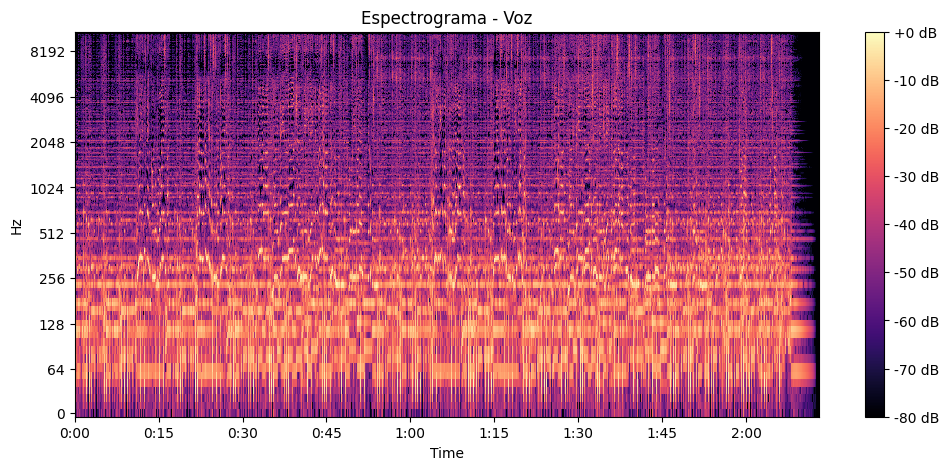

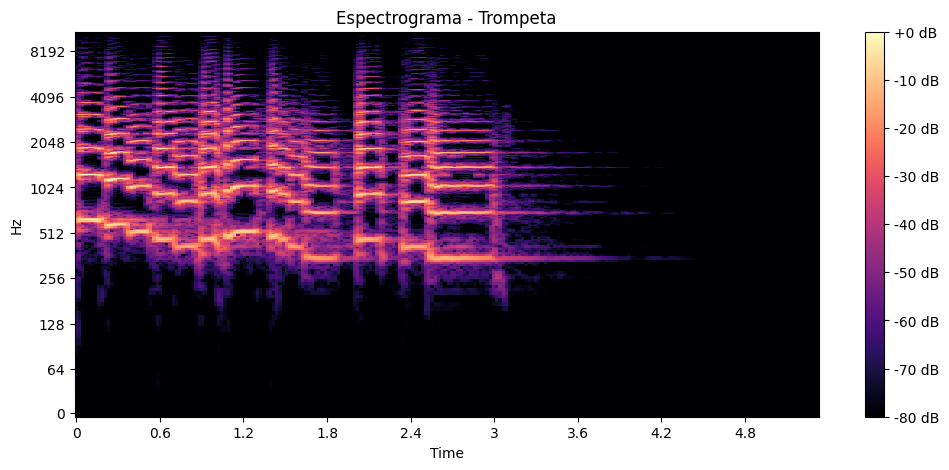

In [10]:
# ------------ Espectrogramas ------------
S_voice = librosa.stft(y_voice)
S_db_voice = librosa.amplitude_to_db(np.abs(S_voice), ref=np.max)

S_trumpet = librosa.stft(y_trumpet)
S_db_trumpet = librosa.amplitude_to_db(np.abs(S_trumpet), ref=np.max)

plt.figure(figsize=(12, 5))
librosa.display.specshow(S_db_voice, sr=sr_voice, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Espectrograma - Voz")
plt.show()

plt.figure(figsize=(12, 5))
librosa.display.specshow(S_db_trumpet, sr=sr_trumpet, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Espectrograma - Trompeta")
plt.show()

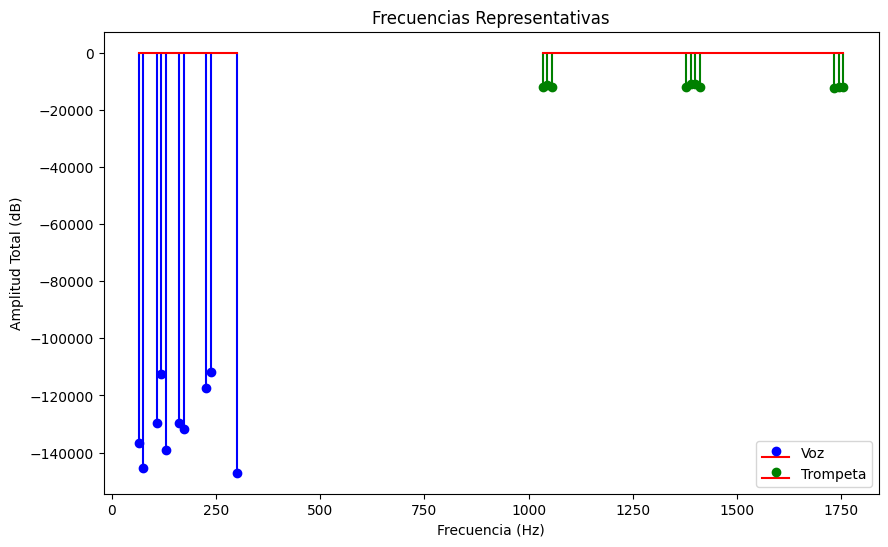

In [11]:
# ------------ Frecuencias representativas ------------

def top_frequencies(S_db, sr, top_n=10):
    freqs = librosa.fft_frequencies(sr=sr)
    sum_amplitudes = np.sum(S_db, axis=1)
    top_indices = np.argsort(sum_amplitudes)[-top_n:][::-1]
    return freqs[top_indices], sum_amplitudes[top_indices]

top_freqs_voice, amps_voice = top_frequencies(S_db_voice, sr_voice)
top_freqs_trumpet, amps_trumpet = top_frequencies(S_db_trumpet, sr_trumpet)

plt.figure(figsize=(10, 6))
plt.stem(top_freqs_voice, amps_voice, linefmt='b-', markerfmt='bo', basefmt='r-', label='Voz')
plt.stem(top_freqs_trumpet, amps_trumpet, linefmt='g-', markerfmt='go', basefmt='r-', label='Trompeta')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Total (dB)')
plt.title('Frecuencias Representativas')
plt.legend()
plt.show()